In [3]:
import pandas as pd
apps_with_duplicates = pd.read_csv('./datasets/apps.csv')

apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', apps.shape[0])

print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                                                App  \
8120        9240                                              tv-ec   
498          599  Chatting - Free chat, random chat, boyfriend, ...   
4781        5765                                       HCP Anywhere   
3537        4439                                       Band O'Clock   
3156        3969                            Servers Ultimate Pack B   

       Category  Rating  Reviews  Size  Installs  Type Price Content Rating  \
8120     FAMILY     NaN        1   3.4       50+  Free     0       Everyone   
498      DATING     4.2     2506   6.1  500,000+  Free     0     Mature 17+   
4781   BUSINESS     4.7      114   8.6    5,000+  Free     0       Everyone   
3537  LIFESTYLE     3.8     1140   0.7  100,000+  Free     0       Everyone   
3156      TOOLS     4.3      668  13.0   50,000+  Free     0       Everyone   

             Genres      Last Updated Current Ver   An

In [4]:

chars_to_remove = ['+', ',', '$']

cols_to_clean = ['Installs', 'Price']


for col in cols_to_clean:
    
    for char in chars_to_remove:
        
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [5]:
import numpy as np


apps['Installs'] = apps['Installs'].astype('float')

apps['Price'] = apps['Price'].astype('float')

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


Number of categories =  33


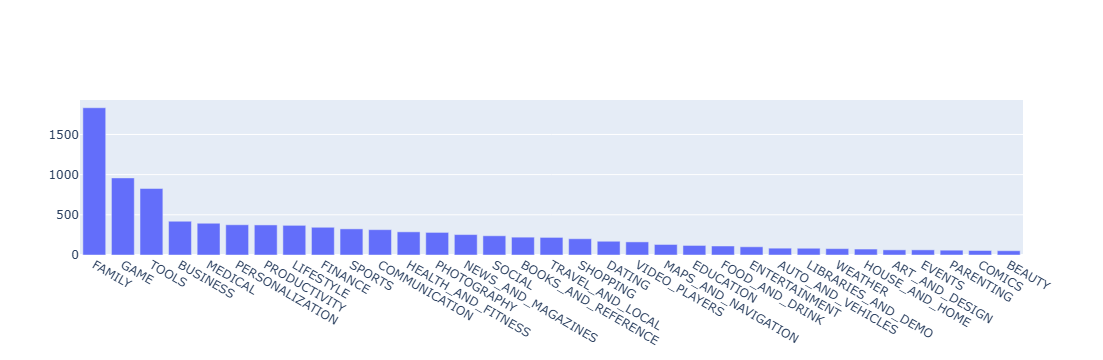

In [6]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

 
num_apps_in_category = apps['Category'].value_counts()


sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]

plotly.offline.iplot(data)

Average app rating =  4.173243045387994


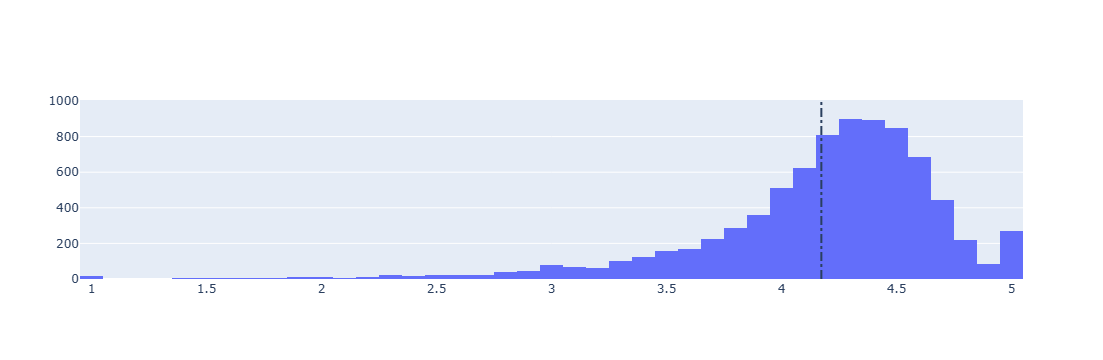

In [7]:

avg_app_rating = apps['Rating'].sum() / apps['Rating'].count() 
print('Average app rating = ', avg_app_rating)


data = [go.Histogram(
    x = apps['Rating']
)]


layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

In [8]:
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")


apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]


large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)


plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])


paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']


plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)


popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]


ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')


apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


In [10]:

apps_under_100 = apps[apps['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

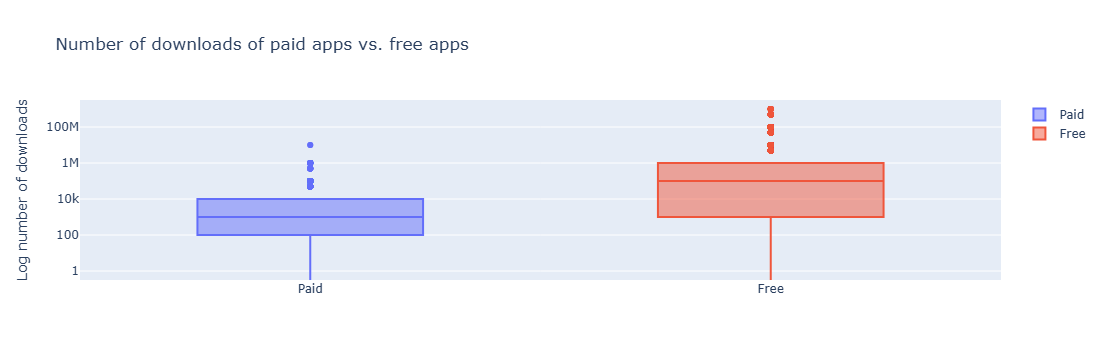

In [11]:
trace0 = go.Box(
    
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)


data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [12]:

reviews_df = pd.read_csv('./datasets/user_reviews.csv')


merged_df = pd.merge(apps, reviews_df, on='App', how='inner')


merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')